#### Wednesday, April 3, 2024

mamba activate t4nlpacv

OpenAI Usage Begin : $0.45
OpenAI Usage Begin : $0.46

I was expecting this to be much higher because the cell that extracts the embeddings took 2m 44.9s to run ... 

The last cell has an api problem and did not run.


# Transfer Learning with Ada Embeddings
copyright 2024, Denis Rothman, MIT License


The reference [OpenAI Embedding and Clustering Cookbook](https://github.com/openai/openai-cookbook/blob/main/examples/Clustering.ipynb) was modified by Denis Rothman for educational purposes.

# Installing OpenAI

In [17]:
# try:
#   import openai
# except:
#   !pip install openai==0.28
#   import openai

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# f = open("drive/MyDrive/files/api_key.txt", "r")
# API_KEY=f.readline()
# f.close()

In [20]:
# import os
# os.environ['OPENAI_API_KEY'] =API_KEY
# openai.api_key = os.getenv("OPENAI_API_KEY")

# Installing tiktoken

In [21]:
# !pip install tiktoken

# Installing Kaggle

In [22]:
# import json
# with open(os.path.expanduser("drive/MyDrive/files/kaggle.json"), "r") as f:
#     kaggle_credentials = json.load(f)

# kaggle_username = kaggle_credentials["username"]
# kaggle_key = kaggle_credentials["key"]

# os.environ["KAGGLE_USERNAME"] = kaggle_username
# os.environ["KAGGLE_KEY"] = kaggle_key

In [23]:
# try:
#   import kaggle
# except:
#   !pip install kaggle
#   import kaggle

In [24]:
# kaggle.api.authenticate()

# 1.The Amazon Fine Food Reviews Dataset

## 1.1. Download the dataset


### Amazon Fine Food Reviews

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews


In [25]:
# !kaggle datasets download -d snap/amazon-fine-food-reviews

 99% 239M/242M [00:12<00:00, 19.3MB/s]
100% 242M/242M [00:12<00:00, 20.4MB/s]


In [26]:
# import zipfile

# zip_file_path = '/content/amazon-fine-food-reviews.zip'
# csv_file_name = 'Reviews.csv'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extract(csv_file_name)

##  1.2. Data preparation

In [3]:
# imports
import pandas as pd
import tiktoken
import openai

openai.__version__

'1.15.0'

In [8]:
import os
import openai

OPENAI_API_KEY_ = os.environ['OPENAI_API_KEY_'] 
openai.api_key = OPENAI_API_KEY_

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY_

In [9]:
from openai import OpenAI # for calling the OpenAI API
client = OpenAI()

In [10]:
# This line fails ... we need to implement a workaround ...
# from openai.embeddings_utils import get_embedding

# https://platform.openai.com/docs/guides/embeddings/use-cases

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

# df['ada_embedding'] = df.combined.apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
# df.to_csv('output/embedded_1k_reviews.csv', index=False)

In [11]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this is the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [6]:
# load & inspect dataset
input_datapath = "AmazonFineFoodReviews/Reviews.csv"  # to save space, we provide a pre-filtered dataset
df = pd.read_csv(input_datapath, index_col=0)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()
df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)
df.head(10)

,Time,ProductId,UserId,Score,Summary,Text,combined
Id,,,,,,,
1,1303862400,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Title: Good Quality Dog Food; Content: I have ...
2,1346976000,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Title: Not as Advertised; Content: Product arr...
3,1219017600,B000LQOCH0,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,"Title: ""Delight"" says it all; Content: This is..."
4,1307923200,B000UA0QIQ,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,Title: Cough Medicine; Content: If you are loo...
5,1350777600,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,Title: Great taffy; Content: Great taffy at a ...
6,1342051200,B006K2ZZ7K,ADT0SRK1MGOEU,4,Nice Taffy,I got a wild hair for taffy and ordered this f...,Title: Nice Taffy; Content: I got a wild hair ...
7,1340150400,B006K2ZZ7K,A1SP2KVKFXXRU1,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Title: Great! Just as good as the expensive b...
8,1336003200,B006K2ZZ7K,A3JRGQVEQN31IQ,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,"Title: Wonderful, tasty taffy; Content: This t..."
9,1322006400,B000E7L2R4,A1MZYO9TZK0BBI,5,Yay Barley,Right now I'm mostly just sprouting this so my...,Title: Yay Barley; Content: Right now I'm most...


In [7]:
# sub sample to 1k most recent reviews and remove samples that are too long
top_n = 1000
df = df.sort_values("Time").tail(top_n * 2)  # first cut to first 2k entries, assuming less than half will be filtered out
df.drop("Time", axis=1, inplace=True)

encoding = tiktoken.get_encoding(embedding_encoding)

# omit reviews that are too long to embed
df["n_tokens"] = df.combined.apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens].tail(top_n)
len(df)

1000

# 2.Running Ada embeddings and saved for future reuse

In [12]:
# Ensure you have your API key set in your environment per the README: https://github.com/openai/openai-python#usage

# This may take a few minutes
# df["embedding"] = df.combined.apply(lambda x: get_embedding(x, engine=embedding_model))
df["embedding"] = df.combined.apply(lambda x: get_embedding(x, model=embedding_model))

# 2m 44.9s 

# Surprisingly, this call only used $0.01 of the API credits.


In [13]:
localEmbeddingsFile = "fine_food_reviews_with_embeddings_1k_KAUWITB.csv"

In [14]:
# df.to_csv("fine_food_reviews_with_embeddings_1k.csv")
df.to_csv(localEmbeddingsFile)

## Save the embeddings to Google Drive or another location

In [32]:
#f = open("drive/MyDrive/files/api_key.txt", "r")
# !cp /content/fine_food_reviews_with_embeddings_1k.csv drive/MyDrive/files/fine_food_reviews_with_embeddings_1k.csv

# 3.Clustering

We use a simple k-means algorithm to demonstrate how clustering can be done. Clustering can help discover valuable, hidden groupings within the data. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

In [16]:
# imports
import numpy as np
import pandas as pd

# load data
# datafile_path = "fine_food_reviews_with_embeddings_1k.csv"

#df = pd.read_csv(datafile_path)
# read the csv file skipping bad lines
# df = pd.read_csv('fine_food_reviews_with_embeddings_1k.csv', error_bad_lines=False)
df = pd.read_csv(localEmbeddingsFile)

In [17]:
# count number of lines in the dataframe
df_line_count = len(df)

# count total lines in the csv file
# with open('fine_food_reviews_with_embeddings_1k.csv') as f:
#     total_line_count = sum(1 for _ in enumerate(f))
with open(localEmbeddingsFile) as f:
    total_line_count = sum(1 for _ in enumerate(f))

In [18]:
# calculate number of bad lines
bad_lines = total_line_count - df_line_count
print(f'Number of bad lines: {bad_lines}')


df["embedding"] = df.embedding.apply(eval).apply(np.array)  # convert string to numpy array
matrix = np.vstack(df.embedding.values)
matrix.shape


Number of bad lines: 1


(1000, 1536)

### 3.1. Find the clusters using K-means

We show the simplest use of K-means. You can pick the number of clusters that fits your use case best.

In [19]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10,random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

df.groupby("Cluster").Score.mean().sort_values()


Cluster
2    4.108434
0    4.191176
1    4.215613
3    4.306358
Name: Score, dtype: float64

### 3.2.Display Clusters with T-SNE

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

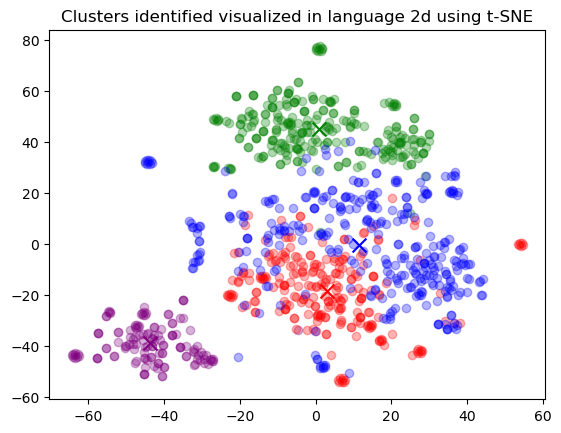

In [20]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")


Visualization of clusters in a 2d projection. In this run, the green cluster (#1) seems quite different from the others. Let's see a few samples from each cluster.

# 4.Text samples in the clusters & naming the clusters

Let's show random samples from each cluster. We'll use davinci-002 to name the clusters, based on a random sample of 5 reviews from that cluster.

In [22]:
import openai

# Reading a review that belongs to each group.
rev_per_cluster = 5

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    reviews = "\n".join(
        df[df.Cluster == i]
        .combined.str.replace("Title: ", "")
        .str.replace("\n\nContent: ", ":  ")
        .sample(rev_per_cluster, random_state=42)
        .values
    )
    response = openai.Completion.create(
        engine="davinci-002",
        prompt=f'What do the following customer reviews have in common?\n\nCustomer reviews:\n"""\n{reviews}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    
    print(response["choices"][0]["text"].replace("\n", ""))

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        print(sample_cluster_rows.Score.values[j], end=", ")
        print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.Text.str[:70].values[j])

    print("-" * 100)


Cluster 0 Theme: 

APIRemovedInV1: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


It's important to note that clusters will not necessarily match what you intend to use them for. A larger amount of clusters will focus on more specific patterns, whereas a small number of clusters will usually focus on largest discrepencies in the data.